In [887]:
# importing Libraries 
import pandas as pd
import numpy as np


In [888]:
df = pd.read_csv("laptop_data.csv")

In [889]:
df.sample(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
143,143,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.1kg,32074.56
576,576,Toshiba,Ultrabook,14.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.24kg,99367.20
228,228,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 500GB HDD,Nvidia GeForce GTX 950M,Windows 10,2.69kg,47472.48


In [890]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [891]:
df.duplicated().sum()

0

In [892]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [893]:
df.drop("Unnamed: 0",axis = 1,  inplace = True)

In [894]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [895]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\guriv\AppData\Local\Temp\ipykernel_5072\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

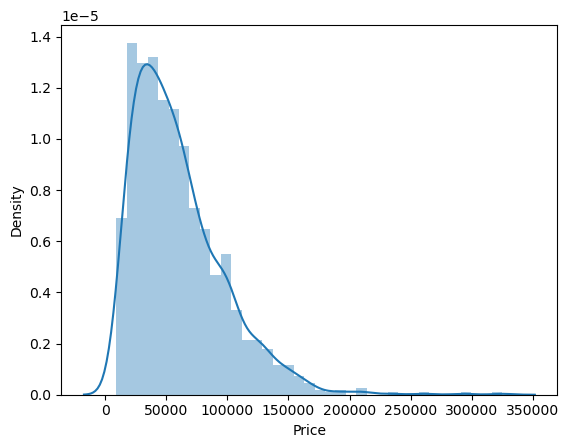

In [896]:
sns.distplot(df["Price"])

<Axes: xlabel='Company'>

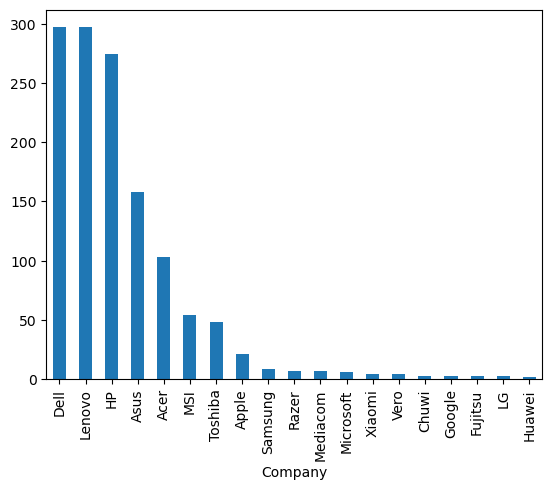

In [897]:
df["Company"].value_counts().plot(kind = "bar")


<function matplotlib.pyplot.show(close=None, block=None)>

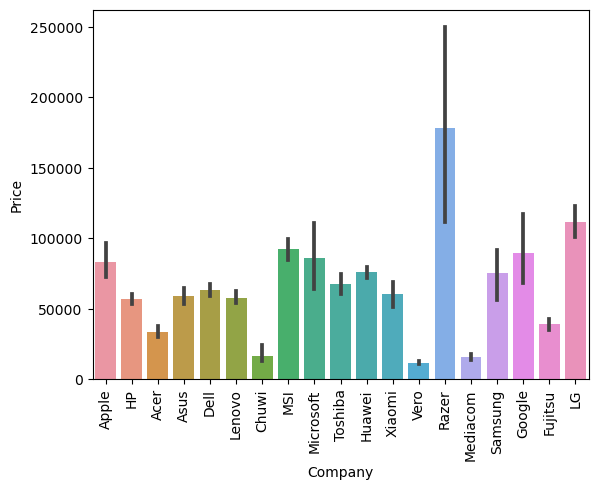

In [898]:
sns.barplot(x = df["Company"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show


In [899]:
# Replace "GB" and "kg" with empty string in "Ram" and "Weight" columns
df["Ram"] = df["Ram"].str.replace("GB", "").str.strip()
df["Weight"] = df["Weight"].str.replace("kg", "").str.strip()

# Convert "Ram" and "Weight" columns to the appropriate data types
df["Ram"] = pd.to_numeric(df["Ram"], errors="coerce")
df["Weight"] = pd.to_numeric(df["Weight"], errors="coerce")

# Check for any conversion errors
print("Conversion errors in Ram column:", df["Ram"].isnull().sum())
print("Conversion errors in Weight column:", df["Weight"].isnull().sum())


Conversion errors in Ram column: 0
Conversion errors in Weight column: 0


In [900]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


<Axes: ylabel='count'>

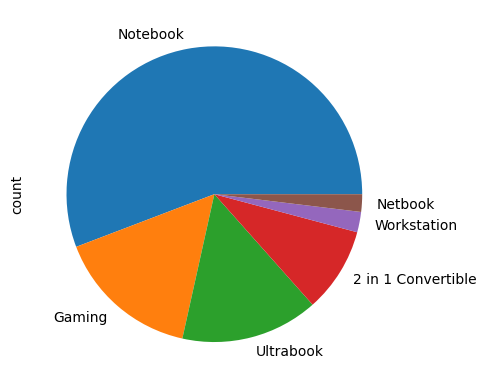

In [901]:
df["TypeName"].value_counts().plot(kind = "pie")

C:\Users\guriv\AppData\Local\Temp\ipykernel_5072\2945259378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Inches"])


<Axes: xlabel='Inches', ylabel='Density'>

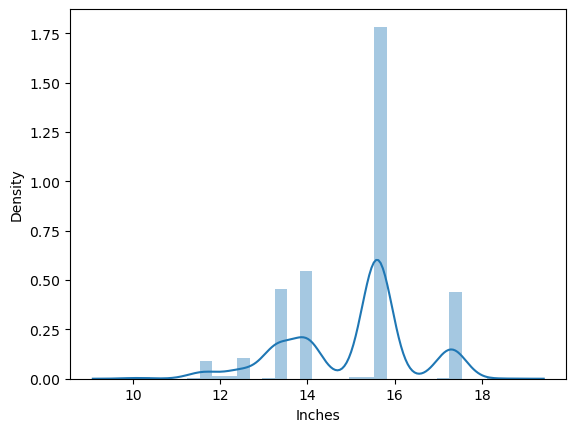

In [902]:
sns.distplot(df["Inches"])

In [903]:
df["ScreenResolution"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [904]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [905]:
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [906]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
301,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,113060.160,0
299,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,1.63,78215.040,0
225,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.20,44328.960,0
14,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,8,256GB SSD,Intel HD Graphics 615,macOS,0.92,67260.672,0
1043,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,55922.688,0


In [907]:
df["IPS"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

<Axes: ylabel='count'>

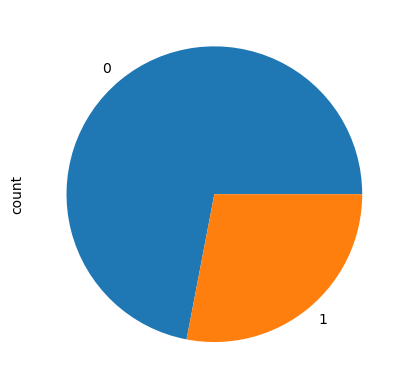

In [908]:
df["IPS"].value_counts().plot(kind = "pie" )

<Axes: xlabel='IPS', ylabel='Price'>

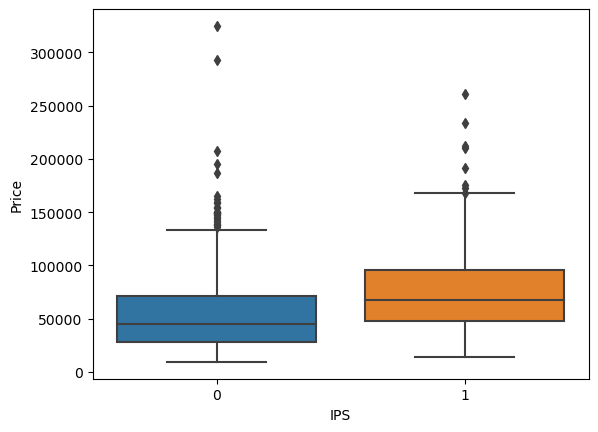

In [909]:
sns.boxplot(x = df["IPS"], y = df["Price"])

In [910]:
df["y_resolution"] = df["ScreenResolution"].str.split("x").str[1]

In [911]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,y_resolution
490,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.300,53918.8272,0,1,1080
702,Lenovo,Notebook,15.6,1366x768,AMD A12-Series 9720P 3.6GHz,8,1TB HDD,AMD Radeon R7,Windows 10,2.200,22857.1200,0,0,768
1185,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.591,48431.5200,0,1,1080
484,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.300,30103.2000,0,0,768
62,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.700,31914.7200,0,1,1080


In [912]:
 df["x_resolution"]= df["ScreenResolution"].str.split("x").str[0]

In [913]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,y_resolution,x_resolution
672,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.30,55091.5200,1,1,1080,IPS Panel Full HD / Touchscreen 1920
1116,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,256GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,146519.4672,0,1,1080,IPS Panel Full HD 1920
576,Toshiba,Ultrabook,14.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.24,99367.2000,1,0,1080,Full HD / Touchscreen 1920
288,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,62817.1200,0,1,1080,IPS Panel Full HD 1920
217,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.6800,0,0,1080,Full HD 1920


In [914]:
df["x_resolution"].str.replace(",", "").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: x_resolution, Length: 1303, dtype: object

In [915]:
df["x_resolution"] = df["x_resolution"].str.replace(",", "").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])


In [916]:
df["x_resolution"] = df["x_resolution"].astype(int)
df["y_resolution"] = df["y_resolution"].astype(int)

In [917]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,y_resolution,x_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560


In [918]:
df.describe()

,Inches,Ram,Weight,Price,Touchscreen,IPS,y_resolution,x_resolution
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910,0.147352,0.280123,1070.830391,1894.784344
std,1.426304,5.084665,0.665475,37243.201786,0.354593,0.449231,284.519410,494.641028
min,10.100000,2.000000,0.690000,9270.720000,0.000000,0.000000,768.000000,1366.000000
25%,14.000000,4.000000,1.500000,31914.720000,0.000000,0.000000,900.000000,1600.000000
50%,15.600000,8.000000,2.040000,52054.560000,0.000000,0.000000,1080.000000,1920.000000
75%,15.600000,8.000000,2.300000,79274.246400,0.000000,1.000000,1080.000000,1920.000000
max,18.400000,64.000000,4.700000,324954.720000,1.000000,1.000000,2160.000000,3840.000000


In [919]:
# Drop non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()["Price"]


Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
y_resolution    0.552809
x_resolution    0.556529
Name: Price, dtype: float64

In [920]:
df.shape

(1303, 15)

In [921]:
# Calculate pixels per inch (PPI) using Pythagorean theorem (hypotenuse calculation) and divide by screen size (in inches)
df["ppf"] = ((df["x_resolution"] ** 2) + (df["y_resolution"] ** 2)) ** 0.5 / df["Inches"]



In [922]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,y_resolution,x_resolution,ppf
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560,226.983005


In [923]:
df.drop(columns = ["ScreenResolution", "x_resolution", "y_resolution", "Inches"],  inplace = True)

In [924]:
df.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppf
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [925]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [926]:
 df["Cpu_name"] = df["Cpu"].str.split().str[0:3].str.join(" ")

In [927]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppf,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5


In [928]:
def fetch_processor(text):
    # Check if the input text matches specific Intel Core processor models
    if text == "Intel Core i5" or text == "Intel Core i7" or text == "Intel Core i3":
        return text  # Return the matched processor model
    # If the input text starts with "Intel" but is not a specific Core i5/i7/i3 model
    elif text.split()[0] == "Intel":
        return "Other Intel Processor"  # Return a generic Intel processor label
    else:
        return "AMD PROCESSOR"  # Return the label for AMD processors
    

In [929]:
df["cpu_brand"] = df["Cpu_name"].apply(fetch_processor)

In [930]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppf,Cpu_name,cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='cpu_brand'>

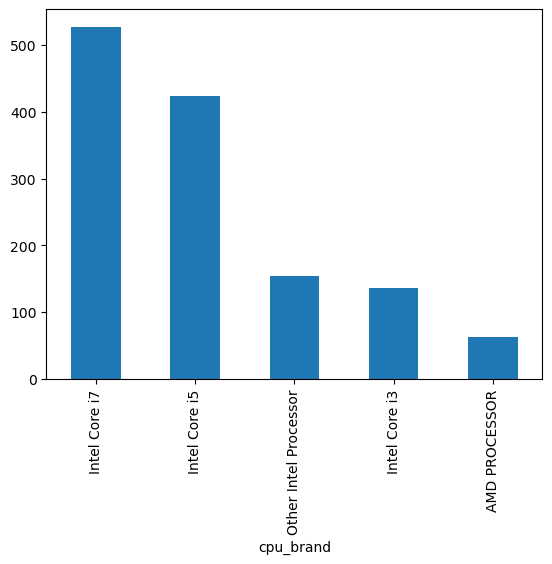

In [931]:
df["cpu_brand"].value_counts().plot(kind = "bar")

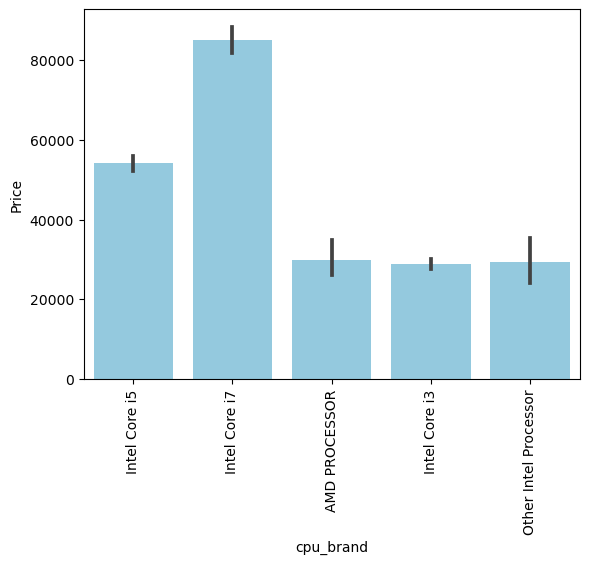

In [932]:
sns.barplot(x=df["cpu_brand"], y=df["Price"], color='skyblue')
plt.xticks(rotation="vertical")
plt.show()

In [933]:
   
df.drop(columns = ["Cpu_name", "Cpu"] ,  inplace = True )

In [934]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppf,cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [935]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int64  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float64
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   IPS          1303 non-null   int64  
 10  ppf          1303 non-null   float64
 11  cpu_brand    1303 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 122.3+ KB


<Axes: xlabel='Ram'>

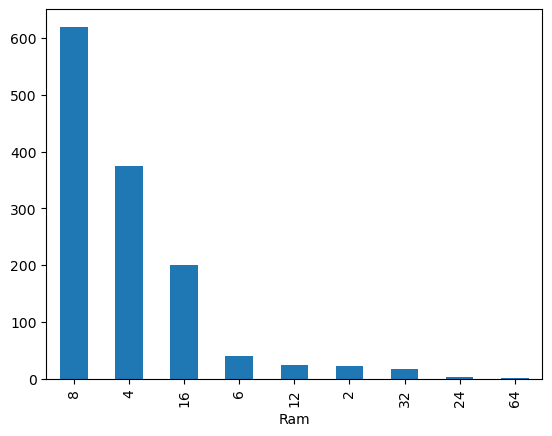

In [936]:
df["Ram"].value_counts().plot(kind = "bar")

In [937]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [938]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppf,cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [939]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [940]:
# Convert 'Memory' column to string, remove decimal points, and remove 'GB' or replace 'TB' with '000'
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split 'Memory' column into two layers based on '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract first layer information
df["first"] = new[0]
df["first"] = df["first"].str.strip()

# Extract second layer information
df["second"] = new[1]

# Create binary columns for storage types in first layer
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-digit characters from first layer
df['first'] = df['first'].str.replace(r'\D', '')

# Fill NaN values in second layer with '0'
df["second"].fillna("0", inplace=True)

# Create binary columns for storage types in second layer
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-digit characters from second layer
df['second'] = df['second'].str.replace(r'\D', '')


In [941]:
df["first"] = df["first"].str.split(" ").str[0]


In [942]:
df["second"] = df["second"].str.strip().str.split(" ").str[0]

In [943]:
df[df["second"]=='  1000 HDD']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage


In [944]:

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [945]:
df.sample(4)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppf,cpu_brand,HDD,SSD,Hybrid,Flash_Storage
1095,Acer,Notebook,8,256 SSD + 1000 HDD,Nvidia GeForce GTX 950M,Windows 10,2.4,42570.72,0,0,141.211998,Intel Core i5,1000,256,0,0
941,Asus,Notebook,4,1000 HDD,Nvidia GeForce 920MX,Windows 10,2.8,28238.40,0,0,106.113062,Other Intel Processor,1000,0,0,0
531,Toshiba,Notebook,8,500 HDD,Intel HD Graphics 620,Windows 10,2.0,45820.80,0,1,141.211998,Intel Core i5,500,0,0,0
829,Acer,Notebook,8,128 SSD,Intel HD Graphics 620,Windows 10,1.5,32980.32,0,1,157.350512,Intel Core i3,0,128,0,0


In [946]:
df.drop(columns = ["Hybrid", "Flash_Storage" ], inplace = True)

In [947]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppf,cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [948]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [949]:
df["Gpu"] = df["Gpu"].apply(lambda x: x.split()[0])

In [950]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppf,cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,128 SSD,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,128 Flash Storage,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,256 SSD,Intel,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,512 SSD,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,256 SSD,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [951]:
df["Gpu"].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [952]:
df = df[~(df["Gpu"] == "ARM")]

(array([0, 1, 2]),
 [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')])

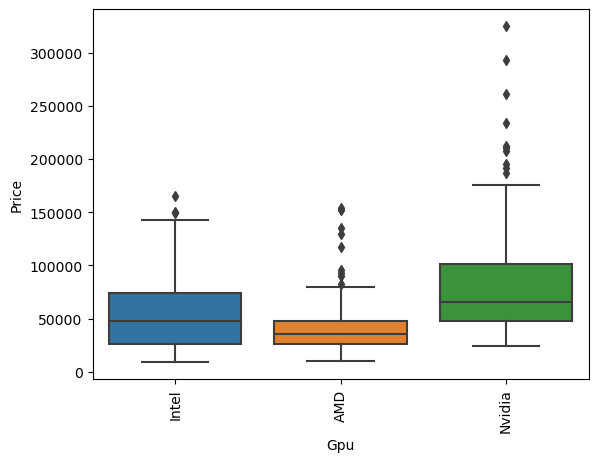

In [953]:
sns.boxplot( x= df["Gpu"],
    y= df["Price"])
plt.xticks(rotation = "vertical")

In [954]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [955]:
def ostype(text):
    if text == "Windows 10" or text == "Windows 7" or text == "Windows 10 S":
        return "windows"
    elif text == "macOS" or text == "Mac OS X":
        return "MAC"
    else:
        return "Other"

In [956]:
df["os"] = df["OpSys"].apply(ostype)

In [957]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppf,cpu_brand,HDD,SSD,os
0,Apple,Ultrabook,8,128 SSD,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,MAC
1,Apple,Ultrabook,8,128 Flash Storage,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,MAC
2,HP,Notebook,8,256 SSD,Intel,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Other
3,Apple,Ultrabook,16,512 SSD,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,MAC
4,Apple,Ultrabook,8,256 SSD,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,MAC


In [958]:
df.drop(columns = "OpSys", inplace = True)

(array([0, 1, 2]),
 [Text(0, 0, 'MAC'), Text(1, 0, 'Other'), Text(2, 0, 'windows')])

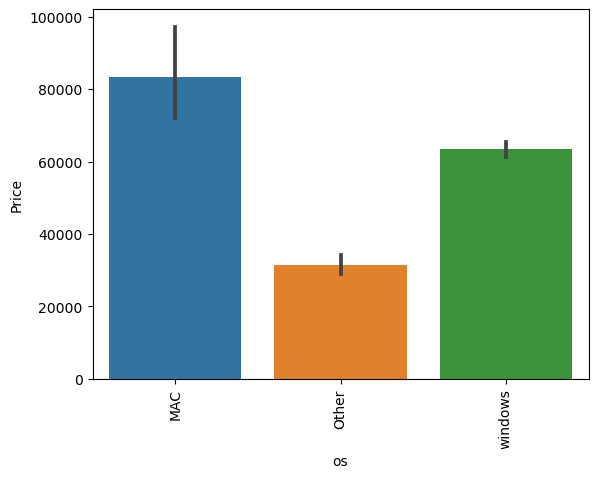

In [959]:
sns.barplot( x= df["os"],
    y= df["Price"])
plt.xticks(rotation = "vertical")

C:\Users\guriv\AppData\Local\Temp\ipykernel_5072\196129849.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"])


<Axes: xlabel='Weight', ylabel='Density'>

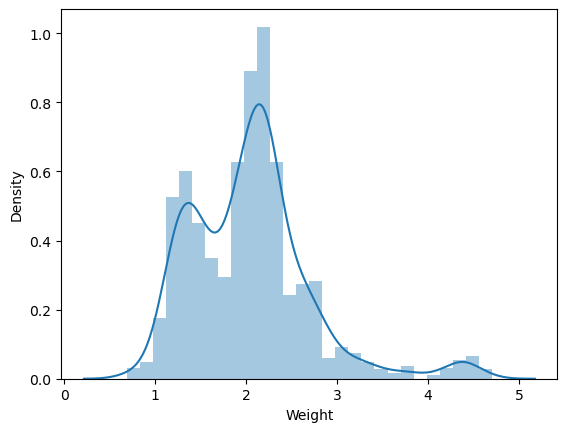

In [960]:
sns.distplot(df["Weight"])

In [961]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   Memory       1302 non-null   object 
 4   Gpu          1302 non-null   object 
 5   Weight       1302 non-null   float64
 6   Price        1302 non-null   float64
 7   Touchscreen  1302 non-null   int64  
 8   IPS          1302 non-null   int64  
 9   ppf          1302 non-null   float64
 10  cpu_brand    1302 non-null   object 
 11  HDD          1302 non-null   int64  
 12  SSD          1302 non-null   int64  
 13  os           1302 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 152.6+ KB


C:\Users\guriv\AppData\Local\Temp\ipykernel_5072\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

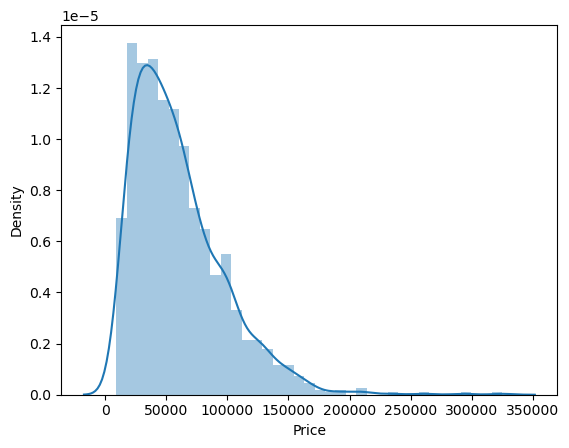

In [962]:
sns.distplot(df["Price"])

In [963]:
df["Price"].skew()

1.5197503994318975

In [964]:
import statsmodels.api as sm

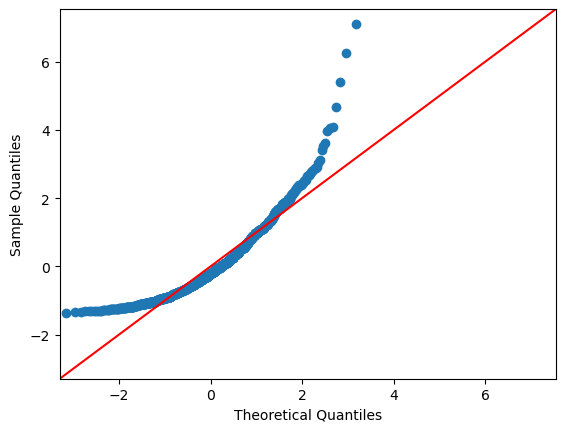

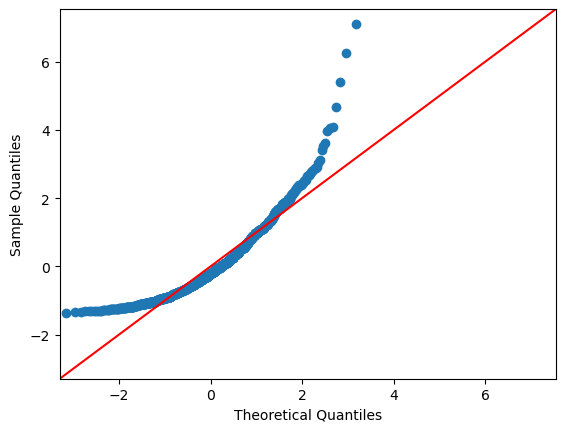

In [965]:
sm.qqplot(df["Price"], fit = True, line = "45")

In [966]:
# as the label data is right skewed it is transformed to normal distribution 
X = df.drop(columns = ["Price", "Memory" ])
y = np.log(df["Price"])

In [967]:
df

,Company,TypeName,Ram,Memory,Gpu,Weight,Price,Touchscreen,IPS,ppf,cpu_brand,HDD,SSD,os
0,Apple,Ultrabook,8,128 SSD,Intel,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,MAC
1,Apple,Ultrabook,8,128 Flash Storage,Intel,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,MAC
2,HP,Notebook,8,256 SSD,Intel,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Other
3,Apple,Ultrabook,16,512 SSD,AMD,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,MAC
4,Apple,Ultrabook,8,256 SSD,Intel,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,MAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,windows
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,windows
1300,Lenovo,Notebook,2,64 Flash Storage,Intel,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,windows
1301,HP,Notebook,6,1000 HDD,AMD,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,windows


In [968]:
X


,Company,TypeName,Ram,Gpu,Weight,Touchscreen,IPS,ppf,cpu_brand,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Intel Core i5,0,128,MAC
1,Apple,Ultrabook,8,Intel,1.34,0,0,127.677940,Intel Core i5,0,0,MAC
2,HP,Notebook,8,Intel,1.86,0,0,141.211998,Intel Core i5,0,256,Other
3,Apple,Ultrabook,16,AMD,1.83,0,1,220.534624,Intel Core i7,0,512,MAC
4,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Intel Core i5,0,256,MAC
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,1.80,1,1,157.350512,Intel Core i7,0,128,windows
1299,Lenovo,2 in 1 Convertible,16,Intel,1.30,1,1,276.053530,Intel Core i7,0,512,windows
1300,Lenovo,Notebook,2,Intel,1.50,0,0,111.935204,Other Intel Processor,0,0,windows
1301,HP,Notebook,6,AMD,2.19,0,0,100.454670,Intel Core i7,1000,0,windows


In [969]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [970]:
from sklearn.model_selection import train_test_split


In [971]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 1)

In [997]:
X_train

,Company,TypeName,Ram,Gpu,Weight,Touchscreen,IPS,ppf,cpu_brand,HDD,SSD,os
335,HP,Notebook,8,Intel,1.48,0,0,157.350512,Intel Core i5,0,256,windows
786,MSI,Gaming,8,Nvidia,2.20,0,0,141.211998,Intel Core i5,1000,128,windows
817,HP,Netbook,4,Intel,1.23,0,0,135.094211,Other Intel Processor,0,0,Other
258,MSI,Gaming,16,Nvidia,4.14,0,0,127.335675,Intel Core i7,1000,512,windows
661,Lenovo,Notebook,4,Intel,2.20,0,0,100.454670,Other Intel Processor,500,0,windows
...,...,...,...,...,...,...,...,...,...,...,...,...
715,Lenovo,Notebook,8,Nvidia,1.87,0,1,157.350512,Intel Core i5,0,256,windows
905,LG,Ultrabook,16,Intel,1.08,1,1,141.211998,Intel Core i7,0,512,windows
1096,Dell,Notebook,8,AMD,2.36,0,0,141.211998,Intel Core i5,1000,0,windows
235,Dell,Notebook,16,AMD,2.36,0,0,141.211998,Intel Core i7,0,256,Other


In [973]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1106 entries, 335 to 1061
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1106 non-null   object 
 1   TypeName     1106 non-null   object 
 2   Ram          1106 non-null   int64  
 3   Gpu          1106 non-null   object 
 4   Weight       1106 non-null   float64
 5   Touchscreen  1106 non-null   int64  
 6   IPS          1106 non-null   int64  
 7   ppf          1106 non-null   float64
 8   cpu_brand    1106 non-null   object 
 9   HDD          1106 non-null   int64  
 10  SSD          1106 non-null   int64  
 11  os           1106 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 112.3+ KB


In [974]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [975]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [976]:
pip install xgboost

In [977]:
from sklearn.preprocessing import OneHotEncoder
step1 = ColumnTransformer(transformers= [("trf1", OneHotEncoder(drop = "first", sparse = False), [0,1,3,8,11])],remainder = "passthrough")

In [978]:
step2 = LinearRegression()

In [979]:
pipe = Pipeline([("step1", step1), ("step2", step2)])

In [980]:
pipe.fit(X_train, y_train)

C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 11])])),
                ('step2', LinearRegression())])

In [981]:
y_pred = pipe.predict(X_test)


In [982]:
from sklearn.metrics import r2_score

In [983]:
print("r2_score", r2_score(y_test, y_pred))

r2_score 0.7919644439880025


In [984]:

from sklearn.metrics import mean_squared_error
pipe = Pipeline([
    ("step1", ColumnTransformer(
        transformers=[
            ("trf1", OneHotEncoder(drop="first", sparse=False), [0, 1, 3, 8, 11])
        ],
        remainder="passthrough"
    )),
    ("step2", Ridge(alpha=10))
])

# Fit the pipeline to the training data and make predictions
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Evaluate the model
print("r2_score", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)



r2_score 0.7836313087150604
MSE 0.07796577545916215


C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [985]:
np.exp(mse)

1.0810856583766635

In [986]:
# Define the pipeline
pipe = Pipeline([
    ("step1", ColumnTransformer(
        transformers=[
            ("trf1", OneHotEncoder(drop="first", sparse=False), [0, 1, 3, 8, 11])
        ],
        remainder="passthrough"
    )),
    ("step2", Lasso(alpha=0.001))
])

# Fit the pipeline to the training data and make predictions
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Evaluate the model
print("r2_score", r2_score(y_test, y_pred))

r2_score 0.7831277137430378


C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [987]:
from sklearn.preprocessing import OneHotEncoder
step1 = ColumnTransformer(transformers= [("trf1", OneHotEncoder(drop = "first", sparse = False), [0,1,3,8,11])],remainder = "passthrough")
step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([("step1", step1), ("step2", step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("r2_score", r2_score(y_test, y_pred))

r2_score 0.715821962737841


C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [988]:
from sklearn.preprocessing import OneHotEncoder
step1 = ColumnTransformer(transformers= [("trf1", OneHotEncoder(drop = "first", sparse = False), [0,1,3,8,11])],remainder = "passthrough")
step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([("step1", step1), ("step2", step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("r2_score", r2_score(y_test, y_pred))

C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.715821962737841


In [989]:
 
from sklearn.preprocessing import OneHotEncoder
step1 = ColumnTransformer(transformers= [("trf1", OneHotEncoder(drop = "first", sparse = False), [0,1,3,8,11])],remainder = "passthrough")
step2 = DecisionTreeRegressor(max_depth=13)
pipe = Pipeline([("step1", step1), ("step2", step2)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("r2_score", r2_score(y_test, y_pred))

r2_score 0.8118548519850127


C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1014]:

from sklearn.preprocessing import OneHotEncoder
step1 = ColumnTransformer(transformers= [("trf1", OneHotEncoder(drop = "first", sparse_output=False), [0,1,3,8,11])],remainder = "passthrough")
step2 = RandomForestRegressor(random_state=3, max_features=0.75, max_samples=0.75,  max_depth=15  )
pipe1 = Pipeline([("step1", step1), ("step2", step2)])
pipe1.fit(X_train, y_train)
y_pred = pipe1.predict(X_test)
print("r2_score", r2_score(y_test, y_pred))

r2_score 0.8857403189794584


In [1018]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   Gpu          1302 non-null   object 
 4   Weight       1302 non-null   float64
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   IPS          1302 non-null   int64  
 8   ppf          1302 non-null   float64
 9   cpu_brand    1302 non-null   object 
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  os           1302 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 142.4+ KB


In [1013]:
X_train.head(2)

,Company,TypeName,Ram,Gpu,Weight,Touchscreen,IPS,ppf,cpu_brand,HDD,SSD,os
335,HP,Notebook,8,Intel,1.48,0,0,157.350512,Intel Core i5,0,256,windows
786,MSI,Gaming,8,Nvidia,2.20,0,0,141.211998,Intel Core i5,1000,128,windows


In [1016]:
X_test.shape

(196, 12)

In [991]:
step1 = ColumnTransformer(transformers=[
    ("trf1", OneHotEncoder(drop="first", sparse=False), [0, 1, 3, 8, 11])
], remainder="passthrough")

step2 = XGBRegressor(random_state=3, max_depth=15)

# Create the pipeline
pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

# Fit the pipeline on training data
pipe.fit(X_train, y_train)

# Predict on test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print("r2_score:", r2_score(y_test, y_pred))

C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score: 0.8756970173505247


In [992]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

# Assuming you have defined step1 as in your previous code snippet

# Define base models
model1 = AdaBoostRegressor()
model2 = RandomForestRegressor()
model3 = Ridge(alpha=10)
model4 = SVR()

# Create a voting ensemble
ensemble = VotingRegressor([('ada', model1), ('rf', model2), ('ridge', model3), ('svr', model4)])

# Create pipeline with ensemble model
pipe = Pipeline([("step1", step1), ("ensemble", ensemble)])

# Fit pipeline to training data
pipe.fit(X_train, y_train)

# Predict on test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print("r2_score:", r2_score(y_test, y_pred))


C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score: 0.8350627183684342


In [993]:
from sklearn.ensemble import BaggingRegressor

# Define the bagging regressor with the desired base estimator (e.g., DecisionTreeRegressor)
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=3)

# Define the column transformer
step1 = ColumnTransformer(transformers=[
    ("trf1", OneHotEncoder(drop="first", sparse=False), [0, 1, 3, 8, 11])
], remainder="passthrough")

# Create the pipeline with BaggingRegressor
pipe = Pipeline([
    ("step1", step1),
    ("step2", bagging_regressor)  # Using BaggingRegressor as the second step
])

# Fit the pipeline on training data
pipe.fit(X_train, y_train)

# Predict on test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print("r2_score:", r2_score(y_test, y_pred))


r2_score: 0.8707619507155093


C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [994]:
from sklearn.svm import SVR

# Define the base estimator (SVR)
base_estimator = SVR(kernel='rbf')

# Define the bagging regressor with the specified base estimator
bagging_regressor = BaggingRegressor(base_estimator=base_estimator, random_state=3)

# Define the column transformer
step1 = ColumnTransformer(transformers=[
    ("trf1", OneHotEncoder(drop="first", sparse=False), [0, 1, 3, 8, 11])
], remainder="passthrough")

# Create the pipeline with BaggingRegressor
pipe = Pipeline([
    ("step1", step1),
    ("step2", bagging_regressor)  # Using BaggingRegressor with SVR as the base estimator
])

# Fit the pipeline on training data
pipe.fit(X_train, y_train)

# Predict on test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print("r2_score:", r2_score(y_test, y_pred))


C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\guriv\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


r2_score: 0.5492969729631625


In [1000]:
import pickle




In [998]:
df =df.drop(columns = "Memory")

In [999]:
df

,Company,TypeName,Ram,Gpu,Weight,Price,Touchscreen,IPS,ppf,cpu_brand,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,MAC
1,Apple,Ultrabook,8,Intel,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,MAC
2,HP,Notebook,8,Intel,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Other
3,Apple,Ultrabook,16,AMD,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,MAC
4,Apple,Ultrabook,8,Intel,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,MAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,windows
1299,Lenovo,2 in 1 Convertible,16,Intel,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,windows
1300,Lenovo,Notebook,2,Intel,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,windows
1301,HP,Notebook,6,AMD,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,windows


In [1001]:
pickle.dump(df,open("dfplk", "wb"))
pickle.dump(pipe1,open("pipepkl", "wb"))

In [1003]:
pipe1

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 11])])),
                ('step2',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.75, random_state=3))])

In [1004]:
df

,Company,TypeName,Ram,Gpu,Weight,Price,Touchscreen,IPS,ppf,cpu_brand,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,MAC
1,Apple,Ultrabook,8,Intel,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,MAC
2,HP,Notebook,8,Intel,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Other
3,Apple,Ultrabook,16,AMD,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,MAC
4,Apple,Ultrabook,8,Intel,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,MAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,windows
1299,Lenovo,2 in 1 Convertible,16,Intel,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,windows
1300,Lenovo,Notebook,2,Intel,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,windows
1301,HP,Notebook,6,AMD,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,windows


In [1005]:
X_train


,Company,TypeName,Ram,Gpu,Weight,Touchscreen,IPS,ppf,cpu_brand,HDD,SSD,os
335,HP,Notebook,8,Intel,1.48,0,0,157.350512,Intel Core i5,0,256,windows
786,MSI,Gaming,8,Nvidia,2.20,0,0,141.211998,Intel Core i5,1000,128,windows
817,HP,Netbook,4,Intel,1.23,0,0,135.094211,Other Intel Processor,0,0,Other
258,MSI,Gaming,16,Nvidia,4.14,0,0,127.335675,Intel Core i7,1000,512,windows
661,Lenovo,Notebook,4,Intel,2.20,0,0,100.454670,Other Intel Processor,500,0,windows
...,...,...,...,...,...,...,...,...,...,...,...,...
715,Lenovo,Notebook,8,Nvidia,1.87,0,1,157.350512,Intel Core i5,0,256,windows
905,LG,Ultrabook,16,Intel,1.08,1,1,141.211998,Intel Core i7,0,512,windows
1096,Dell,Notebook,8,AMD,2.36,0,0,141.211998,Intel Core i5,1000,0,windows
235,Dell,Notebook,16,AMD,2.36,0,0,141.211998,Intel Core i7,0,256,Other


In [1010]:
pipe1

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 3, 8, 11])])),
                ('step2',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.75, random_state=3))])

In [1017]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   Gpu          1302 non-null   object 
 4   Weight       1302 non-null   float64
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   IPS          1302 non-null   int64  
 8   ppf          1302 non-null   float64
 9   cpu_brand    1302 non-null   object 
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  os           1302 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 142.4+ KB
